In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-nwdr6r7t because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Lesson 9: Linear Least Squares

## Linear Least Squares and Normal Equations

Consider a set of $m$ data points $\{(t_1,y_1),(t_2,y_2), ...,(t_m,y_m)\}$. Suppose we want to find a straight line that best fits these data points. Mathematically, we want to find the slope and intercept ($x_1$ and $x_2$ respectively) such that

$$y_i = x_1 t_i + x_2, \qquad i \in \{1,2,...,m\} $$

We can write this more explicitly as ${\bf y} = {\bf t}\cdot x_1 + 1\cdot x_2$, which lets us separate the coefficients we are trying to solve for ($x_1$ and $x_2$) from the input data that we have (${\bf y}$ and ${\bf t}$).  Now we can put these values into a matrix format:

$$\begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_m\end{bmatrix} = \begin{bmatrix}t_1 & 1 \\ t_2 & 1 \\ \vdots & \vdots \\ t_m & 1\end{bmatrix} \begin{bmatrix}x_1 \\ x_2\end{bmatrix} \qquad \Leftrightarrow \qquad {\bf y} = {\bf A}{\bf x}$$

where ${\bf A}$ is the design matrix that is a function of the $t_i$ data, ${\bf y}$ is the vector with the $y_i$ data and ${\bf x}$ is the vector with the coefficients $x_i$.  Notice how the values that multiply our coefficients $x_i$ are the columns of ${\bf A}$.

Generally, if we have a linear system where ${\bf A}$ is an $m \times n$ matrix and $m > n$ we call this system **overdetermined**. For these systems, the equality is usually not exactly satisfiable as ${\bf y}$ may not lie in the column space of ${\bf A}$. Therefore, an overdetermined system is better written as

$${\bf A}{\bf x} \cong {\bf y}  $$

For an overdetermined system ${\bf A}{\bf x} \cong {\bf y}$, we are typically looking for a solution ${\bf x}$  that minimizes the squared norm of the residual vector ${\bf r} = {\bf y}-{\bf A x}$,

$$ \min_{\bf x} ||{\bf r}||^2 = \min_{\bf x} ||{\bf y} - {\bf A x}||^2$$

This problem  is called a **linear least-squares problem**, and the solution ${\bf x}$ is called least-squares solution. You learned during lecture that the solution of the least squares problem is also the solution of the system of **normal equations**:

$${\bf A}^T {\bf A}{\bf x} = {\bf A}^T {\bf y}  $$

### Example 1 - fitting a line

Consider the data set given by `pts`:

[2 3 5 6]


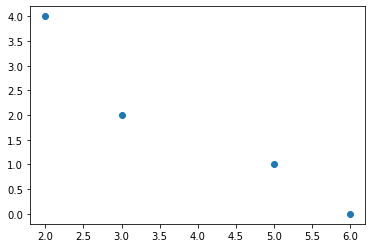

In [2]:
pts = np.array([[2, 4], [3, 2], [5, 1], [6, 0]])
t_line = pts[:,0]


y_line = pts[:,1]

plt.plot(t_line, y_line, 'o')
print(t_line)

**Check your answers:**

Define the matrix ${\bf A}$ that can be used to solve for the coefficients $x_1$ and $x_2$.

Store the value of it in variable `A_line`.

*Hint: Try to define the design matrix programmatically (i.e. not hard-coded). Rather than iterating through a loop, you can directly construct ${\bf A}^T$ as a NumPy array whose first entry is `t_line` and whose second entry is a vector of `1`s, then apply the transpose with `.T` to obtain ${\bf A}$ as desired.*

*Hint: To obtain the vector of `1`s with appropriate length, you may use `t_line**0` or `np.ones_like(t_line)`. Recalling the syntax for power in Python and broadcasting, can you reason why the first option works?*

In [3]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
# Define A_line here

vec_ones = np.ones_like(t_line)
A_T = np.array([t_line, vec_ones])

A_line = A_T.T

A_line

array([[2, 1],
       [3, 1],
       [5, 1],
       [6, 1]])

**Check your answers:**

Use the normal equations to find the coefficients in ${\bf x}$.

Store the value of it in variable `x_line`.

In [4]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 

x_line = la.solve(A_line.T @ A_line, A_line.T @ y_line)

Plot the points and fit curve:

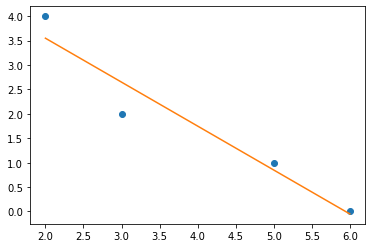

In [5]:
plt.plot(t_line, y_line, 'o')
plt.plot(t_line, t_line * x_line[0] + x_line[1])

## Linear Least Squares and QR

While easy to understand and remember, using the normal equations can be prone to numerical instabilities (you will learn more about this if you take a Numerical Methods or Analysis class! Hint hint!)

Instead of solving the normal equations using the design matrix ${\bf A}$, we will instead use its QR decomposition

$$ {\bf A} = {\bf QR} $$

where ${\bf Q}$ is an orthogonal matrix and ${\bf R}$ is an upper triangular matrix. Hence the least squares solution ${\bf x}$ can be obtained as:

$$ {\bf A}^T{\bf Ax} = {\bf A}^T{\bf y} \quad \Leftrightarrow \quad {\bf Rx} = {\bf Q}^T{\bf y}$$

**Check your answers:**

Write the `least_sq` function that uses QR decomposition and finds the least squares solution ${\bf x}$ given matrix ${\bf A}$ and vector ${\bf y}$. Do not use the [numpy.linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) function.

*Hint: Try using the functions [numpy.linalg.qr](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) and [scipy.linalg.solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).*

In [6]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def least_sq(A, y):
    # Find the least squares solution to Ax = y
    # by solving Rx = Q^T y for x where A = QR
    q, r = la.qr(A)
    x = sla.solve_triangular(r, q.T @ y)
    return x

Let's confirm that we get the same answer as we did above with the normal equations.

In [7]:
xqr = least_sq(A_line, y_line)

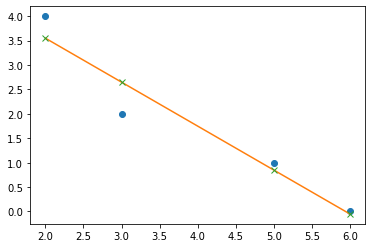

In [8]:
plt.plot(t_line, y_line, 'o')
plt.plot(t_line, t_line * xqr[0] + xqr[1])
plt.plot(t_line, t_line * x_line[0] + x_line[1],'x')

## Example 2: quadratic curve

Lets look at another set of points:

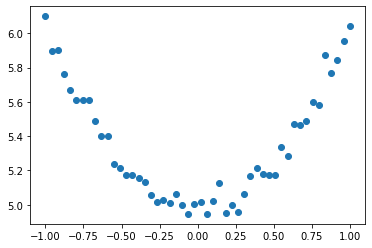

In [9]:
n_quad = 50
t_quad = np.linspace(-1, 1, n_quad)
y_quad = t_quad ** 2 + np.random.randn(n_quad) * 0.05 + 5

plt.plot(t_quad, y_quad, 'o')

This looks a lot like a quadratic function!  Let's try to fit a curve to this:

$$y = x_1 \,t^2 + x_2\,t + x_3$$

**Check your answer:**

We want to find the coefficients $x_1$, $x_2$, and $x_3$ that solve the least squares problem ${\bf A x} \cong {\bf y}$; first, we need to construct the design matrix. Taking ${\bf x} = [x_1, x_2,x_3]^T$, define the design matrix ${\bf A}$ corresponding to the model written above.

Store the value of it in variable `A_quad`.

*Hint: As with example A, try defining the matrix ${\bf A}^T$ then apply the transpose to obtain ${\bf A}$ in a single line of code. This time, what will the first entry (row of the transpose/column of the design matrix) be?*

In [12]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
vec2_ones = np.ones_like(t_quad)
A_T_quad = np.array([t_quad ** 2, t_quad, vec2_ones])

A_quad = A_T_quad.T

y_quad

array([6.09976795, 5.89851829, 5.90449895, 5.75997669, 5.66747047,
       5.61185759, 5.61172369, 5.60874272, 5.48628798, 5.40012601,
       5.40257577, 5.23752863, 5.21321031, 5.17271085, 5.17277375,
       5.15781988, 5.13363822, 5.05620873, 5.0140353 , 5.02601032,
       5.00996435, 5.06062905, 4.99915174, 4.94734554, 5.00674424,
       5.01340343, 4.946461  , 5.02157989, 5.12641217, 4.95395463,
       5.00064792, 4.9579835 , 5.06144621, 5.17011559, 5.21709394,
       5.1784902 , 5.17137179, 5.17551868, 5.33842765, 5.28622194,
       5.47262894, 5.46800947, 5.48723896, 5.60111801, 5.58442226,
       5.87385803, 5.76580748, 5.84481213, 5.95542923, 6.04459222])

Now we solve for the coefficients ${\bf x}$ using the `least_sq` function you have defined above. 

Store the value of it in variable `x_quad`.

In [11]:
x_quad = least_sq(A_quad, y_quad)
x_quad

array([1.06160106e+00, 1.54591187e-03, 4.97921667e+00])

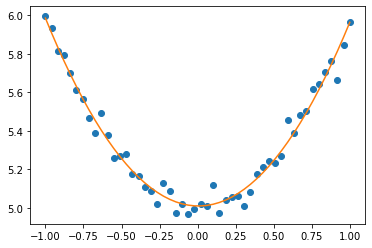

In [41]:
plt.plot(t_quad, y_quad, 'o')
plt.plot(t_quad, x_quad[0] * t_quad ** 2 + x_quad[1] * t_quad + x_quad[2])

As you can see, even though the resulting function does not appear linear, we are still able to use linear least squares here.  This is because the function only needs to be linear with respect to the coefficients $x_i$ (e.g. cannot make direct use of $x_i^2$).

In fact, what we are doing here is simply taking linear combinations of some basis functions:

$$ y = x_1 f_1(t) + x_2 f_2(t) + x_3 f_3(t) $$

$$\begin{align*} f_1(t) &= t^2 \\ f_2(t) &= t \\ f_3(t) &= 1 \end{align*} $$

As long as we can write the function we are trying to fit in this manner (or somehow get it in that form), we can use least squares.

## Example 3: exponential fit

Assume the following set of data points:

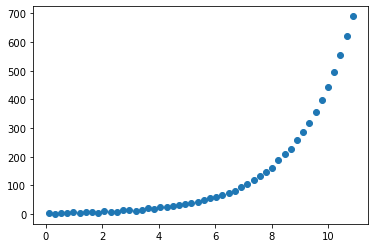

In [42]:
n_exp = 50
t_exp = np.linspace(0.1, np.e * 4, n_exp)
y_exp = np.exp(t_exp * 0.5) * 3 + np.random.randn(n_exp) * 2
y_exp = np.where(y_exp<1e-6, 1e-6, y_exp)
plt.plot(t_exp, y_exp, 'o')

Let's say we want to fit the function

$$ y = x_1\,e^{x_2 \, t} $$

to the above plot. Notice that we can't directly use linear least squares, since the function is not linear with respect to every coefficient $x_i$.  What if we take the natural log of each side?

$$ \ln y = \ln x_1 + x_2 t $$

With the change of variables $\bar y = \ln y$ and $\bar x_1 = \ln x_1$, we can rewrite the above equation as:

$$ \bar y  = \bar x_1 + x_2 t $$

**Check your answers:**

We need to write the design matrix ${\bf A}$ and the right-hand side vector ${\bf \bar y}$ needed to obtain the least squares solution ${\bf \bar x} = [\bar x_1, x_2]$.

Store the value of ${\bf A}$ in variable `A_exp` and the value of ${\bf \bar y}$ in variable `ybar`.

*Hint: Recall that [numpy.log](https://numpy.org/doc/stable/reference/generated/numpy.log.html) computes the natural logarithm by default.*

In [78]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 

ybar = np.log(y_exp)

vec3_ones = np.ones_like(t_exp)

A_exp = np.array([vec3_ones, t_exp]).T

A_exp


array([[ 1.        ,  0.1       ],
       [ 1.        ,  0.31985974],
       [ 1.        ,  0.53971948],
       [ 1.        ,  0.75957922],
       [ 1.        ,  0.97943896],
       [ 1.        ,  1.19929871],
       [ 1.        ,  1.41915845],
       [ 1.        ,  1.63901819],
       [ 1.        ,  1.85887793],
       [ 1.        ,  2.07873767],
       [ 1.        ,  2.29859741],
       [ 1.        ,  2.51845715],
       [ 1.        ,  2.73831689],
       [ 1.        ,  2.95817663],
       [ 1.        ,  3.17803638],
       [ 1.        ,  3.39789612],
       [ 1.        ,  3.61775586],
       [ 1.        ,  3.8376156 ],
       [ 1.        ,  4.05747534],
       [ 1.        ,  4.27733508],
       [ 1.        ,  4.49719482],
       [ 1.        ,  4.71705456],
       [ 1.        ,  4.9369143 ],
       [ 1.        ,  5.15677405],
       [ 1.        ,  5.37663379],
       [ 1.        ,  5.59649353],
       [ 1.        ,  5.81635327],
       [ 1.        ,  6.03621301],
       [ 1.        ,

Now, solve for the coefficients ${\bf \bar x}$ using the `least_sq` function you have defined above.

Store the value of it in variable `xbar`.

In [79]:
xbar = least_sq(A_exp, ybar)
xbar

array([1.00131165, 0.51251951])

**Check your answers:**

You can now use the change of variables to determine the coefficients $x_1$ and $x_2$ from the equation $y = x_1\,e^{x_2 \, t}$

Store the value of them in variables `x1_exp` and `x2_exp` respectively.

*Hint: You will need to use [numpy.exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html).*

In [88]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 

x1_exp = np.exp(xbar[0])

x2_exp = xbar[1]

Plot the points and the fit together:

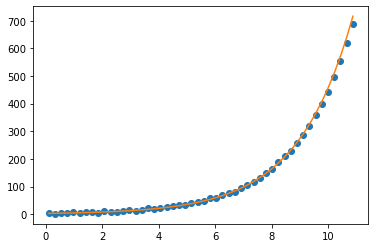

In [89]:
plt.plot(t_exp, y_exp, 'o')
plt.plot(t_exp, x1_exp * np.exp(t_exp * x2_exp))

## Using real data: climate change

![Ice Extent](ice.png)

In addition to fitting functions to data points, we can use least squares to make predictions about future events.  In this example, we have a dataset containing the extent of arctic sea ice for each year since 1979 (given as the average during each October). We will fit least squares models to some of this data, using them to predict the extent of arctic sea ice in future years.

*This is based on ["Using Data from Climate Science to Teach Introductory Statistics"](http://jse.amstat.org/v21n1/witt.pdf) and uses [NOAA data](https://nsidc.org/data/g02135) contributed by [Florence Fetterer](https://nsidc.org/research/bios/fetterer.html), et al.* 

In [3]:
import pandas as pd

ice_data = pd.read_csv("N_10_extent_v3.0.csv", dtype={'year': np.int64, 'extent': np.double})
ice_data.head() # print out first 5 rows of the data

,year,mo,data-type,region,extent,area
0,1979,10,Goddard,N,8.75,6.19
1,1980,10,Goddard,N,9.18,6.50
2,1981,10,Goddard,N,8.86,6.27
3,1982,10,Goddard,N,9.42,6.67
4,1983,10,Goddard,N,9.33,6.79


We have imported a data set for you using [Pandas](https://pandas.pydata.org/docs/user_guide/index.html), a library that provides routines for manipulating data tables.  *You do not need to know how to use Pandas for this activity or course*. Generally, Pandas is useful for organizing large, heterogeneous data sets (for which NumPy falls short).

In [4]:
year = ice_data['year'].values
year

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [5]:
extent = ice_data[' extent'].values
extent

array([8.75, 9.18, 8.86, 9.42, 9.33, 8.56, 8.55, 9.48, 9.05, 9.13, 8.83,
       8.48, 8.54, 9.32, 8.79, 8.92, 7.83, 9.16, 8.34, 8.45, 8.6 , 8.38,
       8.3 , 8.16, 7.85, 7.93, 7.35, 7.54, 6.04, 7.35, 6.92, 6.98, 6.46,
       5.89, 7.45, 7.23, 6.97, 6.08, 6.77, 6.13, 5.73, 5.33, 6.77])

We can use the first 22 years of the ice data to fit a linear function, and then predict future values of ice extent.  Below, we plot the years 1979 to 2000 with the corresponding ice extents.

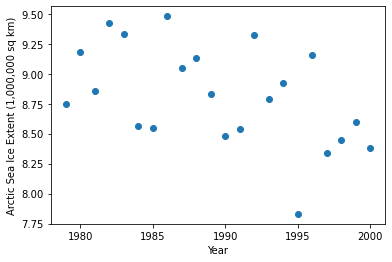

In [6]:
n_ice = 22

plt.xlabel("Year")
plt.ylabel("Arctic Sea Ice Extent (1,000,000 sq km)")
plt.plot(year[:n_ice], extent[:n_ice], 'o')

**Check your answers:**

Using your `least_sq` function and general knowledge of least squares, fit a linear model to the ice extent:

$$y = x_1 \,t + x_2$$

Store your coefficients in the array `x_ice_linear`.

In [13]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
t_ice = year[:n_ice]    # definition of t
y_ice = extent[:n_ice]  # definition of y
# Determine x_ice_linear using your least_sq() function

vec4_ones = np.ones_like(t_ice)
A_4 = np.array([t_ice, vec4_ones]).T


x_ice_linear = least_sq(A_4, y_ice)

x_ice_linear

array([-3.07566347e-02,  7.00062338e+01])

Below is the plot of the 22 given points with those corresponding from the least squares model:

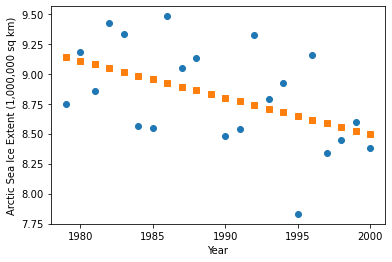

In [14]:
line_model = x_ice_linear[0]*t_ice + x_ice_linear[1]

plt.xlabel("Year")
plt.ylabel("Arctic Sea Ice Extent (1,000,000 sq km)")
plt.plot(year[:n_ice], extent[:n_ice], 'o')
plt.plot(t_ice, line_model , 's')

Suppose we want to use the same model (linear least squares fitted to years 1979 to 2000) to predict the ice extent beyond year 2000. For example, let's consider data from years 1979 to 2021:

In [15]:
years_plus = np.linspace(1979, 2021, 43)
years_plus

array([1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020., 2021.])

**Check your answers:**

Determine the predicted ice extent values for the years 1979 to 2021 according to your `x_ice_linear` model from above.

Store these values in the array `ice_plus`.

*Hint: Do not recompute the model using the additional ice extent data. We can conceive the data from years 1979 to 2000 as our training set and the data from years 2001 to 2021 as our testing/validation set.*

In [18]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 

ice_plus = x_ice_linear[0] * years_plus + x_ice_linear[1]
ice_plus

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

Below, we plot each the actual and predicted data of ice extent for the years 1979 to 2021.

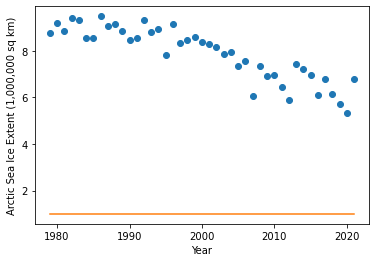

In [19]:
plt.xlabel("Year")
plt.ylabel("Arctic Sea Ice Extent (1,000,000 sq km)")
plt.plot(year, extent, 'o')
plt.plot(years_plus, ice_plus)

How does the predicted ice extent differ from the actual ice extent for each year?

What is the estimated ice extent in 2021? What was the actual value?

In [20]:
ice_plus[-1]

1.0000000000000002

In [21]:
extent[-1]

6.77

The linear model does well until year 2000 (i.e. on the training set), then it fails to account for an apparent increase in the rate of ice melt. Let's use _quadratic_ model to try improving this:

$$ y = x_1 \, t^2 + x_2 \,t + x_3 $$

**Check your answers:**

Using the same `y_ice` and `t_ice` as before (i.e. the training set of years 1979 to 2000), fit the quadratic model above to the ice extent (that is, solve for $x_1$, $x_2$, and $x_3$).

Store your coefficients in the array `x_ice_quad`.

In [22]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 

A_ice = np.transpose(np.array([t_ice * t_ice, t_ice, np.ones(len(t_ice))]))
x_ice_ = least_sq(A_ice, y_ice)
x_ice_quad = least_sq(A_ice, y_ice)
x_ice_quad

array([-1.76948052e-03,  7.01000635e+00, -6.93372153e+03])

We plot the quadratic model below.

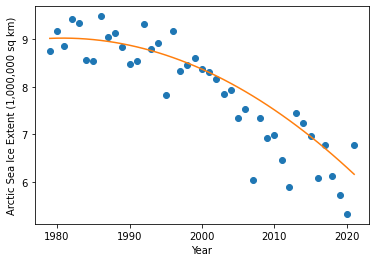

In [23]:
quad_model = x_ice_quad[0]*years_plus**2 + x_ice_quad[1]*years_plus + x_ice_quad[2]

plt.xlabel("Year")
plt.ylabel("Arctic Sea Ice Extent (1,000,000 sq km)")
plt.plot(year, extent, 'o')
plt.plot(years_plus, quad_model )

This model better captures the ice extent beyond year 2000.


**Try this:**

In what year does this quadratic model predict that the ice extent will reach 0 (i.e. the artic ice will have completely melted)?

Solve $x_1\,t^2 + x_2\,t + x_3 = 0$ with your group to compute the answer below.

*Hint: You seek the solutions to a quadratic equation, the analytical formula for which you have likely memorized.*